<a href="https://colab.research.google.com/github/mohamedbasyouny1983/Array-python-practical-code/blob/main/NTI_Project_Res_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.kaggle.com/datasets/likhon148/animal-data

--2024-04-30 10:54:25--  https://www.kaggle.com/datasets/likhon148/animal-data
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘animal-data.1’

animal-data.1           [ <=>                ]   9.62K  --.-KB/s    in 0.01s   

2024-04-30 10:54:25 (653 KB/s) - ‘animal-data.1’ saved [9847]



In [2]:
import keras

from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121,ResNet50
import PIL

In [3]:
# Download the architecture of DenseNet121 with ImageNet weights
base_model_DenseNet121 = DenseNet121(include_top=False, weights='imagenet')
base_model_ResNet50 = ResNet50(include_top=False, weights='imagenet')


# Taking the output of the last convolution block in ResNet50
x_DenseNet121 = base_model_DenseNet121.output
x_ResNet50 = base_model_ResNet50.output


# Adding a Global Average Pooling layer
x_DenseNet121 = GlobalAveragePooling2D()(x_DenseNet121)
x_ResNet50 = GlobalAveragePooling2D()(x_ResNet50)

# Adding a fully connected layer having 1024 neurons
x_DenseNet121 = Dense(1024, activation='relu')(x_DenseNet121)
x_ResNet50 = Dense(1024,activation='relu')(x_ResNet50)

# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions_DenseNet121 = Dense(3, activation='softmax')(x_DenseNet121)
predictions_ResNet50 = Dense(3, activation='softmax')(x_ResNet50)


# Model to be trained
model_DenseNet121 = Model(inputs=base_model_DenseNet121.input, outputs=predictions_DenseNet121)
model_ResNet50 = Model(inputs=base_model_ResNet50.input, outputs=predictions_ResNet50)


# Training only top layers i.e. the layers which we have added in the end
for layer in base_model_DenseNet121.layers:
  layer.trainable = False

for layer in base_model_ResNet50.layers:
  layer.trainable = False

model_DenseNet121.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])
model_ResNet50.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir = "/content/drive/MyDrive/animal_data"
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_data = ImageDataGenerator(rescale=1./255)

train_dir = os.path.join(main_dir, "Train")
training_set = train_data.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_dir = os.path.join(main_dir, "Test")
test_set = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

)


Found 256 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
!pip install tensorflow==2.8.0

In [9]:
result_DenseNet121 = model_DenseNet121.fit_generator(
    training_set,
    steps_per_epoch= 2,
    epochs= 5,
    validation_data=test_set,
    validation_steps= 2
)

<ipython-input-9-43851bd25b24>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result_DenseNet121 = model_DenseNet121.fit_generator(


Epoch 1/5
2/2 [==============================] - 32s 24s/step - loss: 0.1087 - accuracy: 0.9531 - val_loss: 0.3506 - val_accuracy: 0.9219
Epoch 2/5
2/2 [==============================] - 24s 19s/step - loss: 0.1052 - accuracy: 0.9375 - val_loss: 0.2662 - val_accuracy: 0.9375
Epoch 3/5
2/2 [==============================] - 24s 17s/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.3181 - val_accuracy: 0.8906
Epoch 4/5
2/2 [==============================] - 23s 17s/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.4078 - val_accuracy: 0.9219
Epoch 5/5
2/2 [==============================] - 26s 18s/step - loss: 0.0808 - accuracy: 0.9844 - val_loss: 0.2174 - val_accuracy: 0.9688


In [10]:
result_DenseNet121.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
result_ResNet50=model_ResNet50.fit_generator(
    training_set,
    steps_per_epoch=2,
    epochs=5,
    validation_data=test_set,
    validation_steps=2
)

<ipython-input-11-15a1f30f2004>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result_ResNet50=model_ResNet50.fit_generator(


Epoch 1/5
2/2 [==============================] - 33s 21s/step - loss: 2.0228 - accuracy: 0.2344 - val_loss: 2.7507 - val_accuracy: 0.3125
Epoch 2/5
2/2 [==============================] - 28s 20s/step - loss: 2.1568 - accuracy: 0.4062 - val_loss: 1.1354 - val_accuracy: 0.4688
Epoch 3/5
2/2 [==============================] - 29s 20s/step - loss: 1.3253 - accuracy: 0.3750 - val_loss: 1.5441 - val_accuracy: 0.2500
Epoch 4/5
2/2 [==============================] - 28s 20s/step - loss: 1.3925 - accuracy: 0.3281 - val_loss: 1.4000 - val_accuracy: 0.3438
Epoch 5/5
2/2 [==============================] - 28s 20s/step - loss: 1.1746 - accuracy: 0.4219 - val_loss: 1.1237 - val_accuracy: 0.3438


In [13]:
result_ResNet50.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

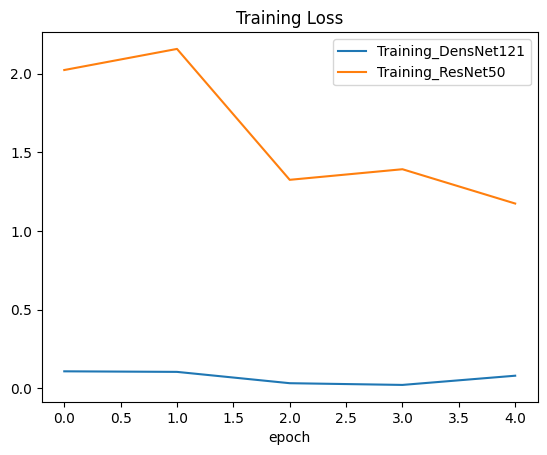

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(result_DenseNet121.history['loss'])
plt.plot(result_ResNet50.history['loss'])
plt.legend(['Training_DensNet121', 'Training_ResNet50'])
plt.title('Training Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

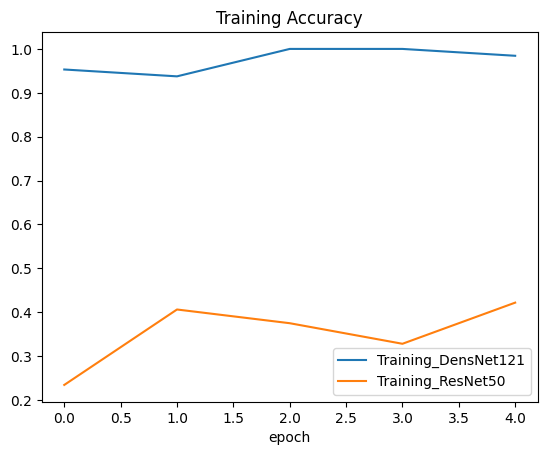

In [17]:
plt.plot(result_DenseNet121.history['accuracy'])
plt.plot(result_ResNet50.history['accuracy'])
plt.legend(['Training_DensNet121', 'Training_ResNet50'])
plt.title('Training Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

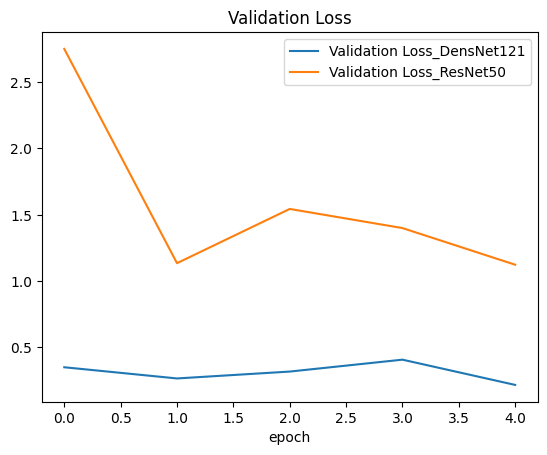

In [19]:
plt.plot(result_DenseNet121.history['val_loss'])
plt.plot(result_ResNet50.history['val_loss'])
plt.legend(['Validation Loss_DensNet121', 'Validation Loss_ResNet50'])
plt.title('Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

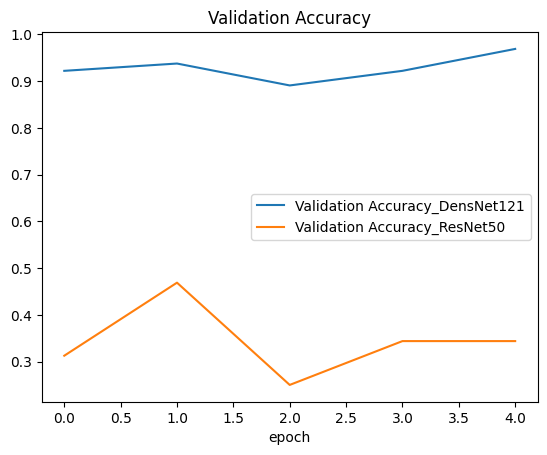

In [20]:
plt.plot(result_DenseNet121.history['val_accuracy'])
plt.plot(result_ResNet50.history['val_accuracy'])
plt.legend(['Validation Accuracy_DensNet121', 'Validation Accuracy_ResNet50'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')

In [23]:
#model_DenseNet121.summary() # 8,090,179

In [24]:
#model_ResNet50.summary() # 25,688,963

In [30]:
#